# Comparative Analysis of Streaming Numbers and YouTube Viewership

#### *This project aims to analyze and compare various factors related to streaming numbers and YouTube viewership in the music industry. The analysis focuses on four main categories:*

* ##### **Comparing Streaming Numbers and YouTube Viewership** 

* ##### **Comparing Numbers between Albums and Singles** 

* ##### **Comparing Numbers between Major and Minor Keys** 

* ##### **Comparing Numbers between Music Artists**

#### *This project employs statistical techniques such as A/B testing, the Central Limit Theorem, hypothesis testing, and data visualization to derive meaningful insights and draw comparisons between the aforementioned categories.*

### Libraries Used in the Project

*  **Pandas (`import pandas as pd`):** Pandas is a powerful data manipulation library that provides high-performance data structures and data analysis tools. It is used in this project to read and handle the dataset, perform data grouping and aggregation, and facilitate data preprocessing tasks.

*  **NumPy (`import numpy as np`):** NumPy is a fundamental library for numerical computing in Python. It provides efficient arrays and mathematical operations on arrays. NumPy is utilized in this project for array manipulation, generating random samples for the Central Limit Theorem, and performing statistical calculations.

*  **Matplotlib (`import matplotlib.pyplot as plt`):** Matplotlib is a popular data visualization library in Python. It provides a wide range of plotting functions and capabilities. Matplotlib is used in this project to create various types of visualizations, including histograms, bar charts, and scatter plots, to analyze and present the data visually.

* **SciPy (`from scipy.stats import ...`):** SciPy is a scientific computing library in Python that provides a wide range of statistical functions and tools. In this project, various functions from the scipy.stats module are imported:
 
 * ***ttest_ind:*** This function is used to perform an independent two-sample t-test, comparing the means of two groups.
 * ***ttest_rel:*** This function is used to perform a paired t-test, comparing the means of two related groups.
 * ***ttest_1samp:*** This function is used to perform a one-sample t-test, comparing the mean of a single group to a specified value.
 * ***norm:*** This class represents a normal distribution, which is used for generating random samples from a normal distribution in the Central Limit Theorem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import norm

In [2]:
df = pd.read_csv('/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv')
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


## Comparing Streaming Numbers and YouTube Views: 

The project examines the relationship between the streaming numbers on Spotify and the viewership of official music videos on YouTube for individual songs. By comparing these metrics, insights can be gained into the popularity and consumption patterns of music across the two platforms.

* **Null Hypothesis (H0):** There is no significant difference between the mean streaming numbers and mean YouTube views for songs in the dataset.
* **Alternative Hypothesis (H1):** There is a significant difference between the mean streaming numbers and mean YouTube views for songs in the dataset.

In [3]:
spotify_streaming = df['Stream']
youtube_views = df['Views']

To compare the streaming numbers and YouTube views, the code line `spotify_streaming = df['Stream']` and `youtube_views = df['Views']` is used.

These assignments allow us to access and work with the streaming numbers and YouTube views as separate variables, enabling us to explore their relationships, calculate statistics, and create visualizations to gain insights into the popularity and consumption patterns of songs across the Spotify and YouTube platforms.

In [4]:
youtube_views.head()
spotify_streaming.head()

0    1.040235e+09
1    3.100837e+08
2    6.306347e+07
3    4.346636e+08
4    6.172597e+08
Name: Stream, dtype: float64

### Checking and Cleaning NaN Values

To ensure data integrity and handle missing values, the following code lines are used to check for NaN values and perform data cleaning:

In [5]:
# Check for NaN values in spotify_streaming
spotify_has_nans = np.isnan(spotify_streaming).any()
if spotify_has_nans:
    print("spotify_streaming contains NaN values.")
else:
    print("spotify_streaming does not contain NaN values.")

# Check for NaN values in youtube_views
youtube_has_nans = np.isnan(youtube_views).any()
if youtube_has_nans:
    print("youtube_views contains NaN values.")
else:
    print("youtube_views does not contain NaN values.")

spotify_streaming contains NaN values.
youtube_views contains NaN values.


##### Filling NaN values with zero:
This code line uses the fillna() method to replace any NaN values in spotify_streaming and youtube_views with zeros (0). This data cleaning step ensures consistency in the dataset and prevents any potential issues or errors in further analysis. This data cleaning method will be applied to the rest of the categories:

In [6]:
# Fill NaN values with zero
spotify_streaming = spotify_streaming.fillna(0)
youtube_views = youtube_views.fillna(0)


In [7]:
# Perform statistical analysis using the Central Limit Theorem

# Set the number of iterations and the sample size for each iteration
num_iterations = 1000
sample_size = 30

In [8]:
# Create an array to store the sample means
sample_means = np.zeros(num_iterations)

In [9]:
# Iterate through the specified number of iterations
for i in range(num_iterations):
    # Randomly sample from Spotify streaming and calculate the sample mean
    spotify_sample = np.random.choice(spotify_streaming, size=sample_size, replace=True)
    spotify_sample_mean = np.mean(spotify_sample)

    # Randomly sample from YouTube views and calculate the sample mean
    youtube_sample = np.random.choice(youtube_views, size=sample_size, replace=True)
    youtube_sample_mean = np.mean(youtube_sample)

    # Calculate the difference in sample means
    sample_means[i] = spotify_sample_mean - youtube_sample_mean

In [10]:
# Perform statistical test on the original data
t_stat, p_value = ttest_ind(spotify_streaming, youtube_views)
t_stat, p_value

(15.966448914758043, 3.244680051127646e-57)

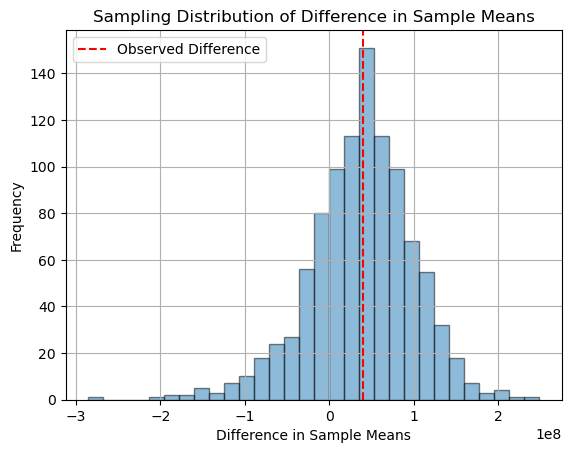

In [11]:
# Plot a histogram of the sampling distribution
plt.hist(sample_means, bins=30, alpha=0.5, edgecolor='black')
plt.xlabel('Difference in Sample Means')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of Difference in Sample Means')
plt.grid(True)

# Add a vertical line to represent the observed difference in sample means
observed_diff = np.mean(spotify_streaming) - np.mean(youtube_views)
plt.axvline(x=observed_diff, color='red', linestyle='--', label='Observed Difference')
plt.legend()

plt.show()

In [12]:
# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a significant difference between Spotify streaming and YouTube views.")
else:
    print("There is no significant difference between Spotify streaming and YouTube views.")


There is a significant difference between Spotify streaming and YouTube views.


In [13]:
# Additional analysis
spotify_mean = np.mean(spotify_streaming)
youtube_mean = np.mean(youtube_views)
print("Mean Spotify streaming:", spotify_mean)
print("Mean YouTube views:", youtube_mean)


Mean Spotify streaming: 132162737.65295878
Mean YouTube views: 91806786.48069312


In [14]:
# Calculate the mean and standard deviation of the sampling distribution
sampling_mean = np.mean(sample_means)
sampling_std = np.std(sample_means)
sampling_mean, sampling_std

(37608557.919866666, 62208331.59808229)

In [15]:
# Hypothesis testing on the sampling distribution

hypothesized_mean_diff = 0  # hypothesized difference in means (null hypothesis)
t_stat_sampling, p_value_sampling = ttest_1samp(sample_means, hypothesized_mean_diff)
t_stat_sampling, p_value_sampling

(19.108248085536385, 1.2893092486066508e-69)

In [16]:
# Interpret the results of hypothesis testing
if p_value_sampling < alpha:
    print("There is a significant difference between Spotify streaming and YouTube views based on the sampling distribution.")
else:
    print("There is no significant difference between Spotify streaming and YouTube views based on the sampling distribution.")

print("Sampling Mean:", sampling_mean)
print("Sampling Standard Deviation:", sampling_std)

There is a significant difference between Spotify streaming and YouTube views based on the sampling distribution.
Sampling Mean: 37608557.919866666
Sampling Standard Deviation: 62208331.59808229


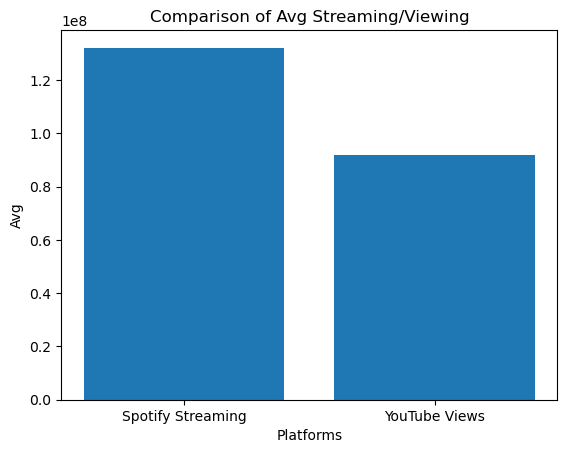

In [17]:
# Create a bar chart to display the results 
labels = ['Spotify Streaming', 'YouTube Views']
values = [spotify_mean, youtube_mean]

plt.bar(labels, values)
plt.xlabel('Platforms')
plt.ylabel('Avg')
plt.title('Comparison of Avg Streaming/Viewing')
plt.show()

In [18]:
# Apply Central Limit Theorem, but w/ Sample Sizing and Normal Distribution
sample_size = 1000  # Define the sample size
num_samples = 1000  # Define the number of samples

In [19]:
# Generate random samples for streaming numbers and YouTube views
streaming_samples = np.random.choice(df['Stream'].dropna(), size=(num_samples, sample_size))
youtube_samples = np.random.choice(df['Views'].dropna(), size=(num_samples, sample_size))

In [20]:
# Calculate the means and standard deviations of the samples
sample_means_streaming = np.mean(streaming_samples, axis=1)
sample_means_youtube = np.mean(youtube_samples, axis=1)
sample_std_streaming = np.std(streaming_samples, axis=1, ddof=1)
sample_std_youtube = np.std(youtube_samples, axis=1, ddof=1)

In [21]:
# Perform statistical analysis on sample means
t_stat, p_value = ttest_rel(sample_means_streaming, sample_means)

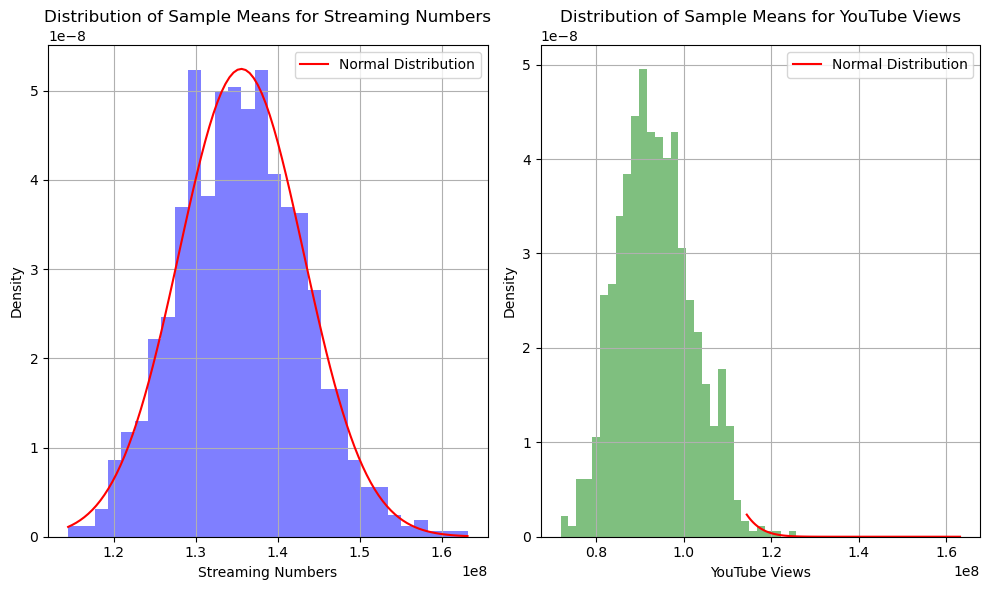

In [22]:
# Visualize the distributions of sample means
plt.figure(figsize=(10, 6))

# Plot the histogram of sample means for streaming numbers
plt.subplot(1, 2, 1)
plt.hist(sample_means_streaming, bins=30, alpha=0.5, density=True, color='blue')
plt.xlabel('Streaming Numbers')
plt.ylabel('Density')
plt.title('Distribution of Sample Means for Streaming Numbers')
plt.grid(True)

# Plot the theoretical normal distribution for streaming numbers
x = np.linspace(np.min(sample_means_streaming), np.max(sample_means_streaming), 100)
pdf_streaming = norm.pdf(x, loc=np.mean(sample_means_streaming), scale=np.std(sample_means_streaming, ddof=1))
plt.plot(x, pdf_streaming, color='red', label='Normal Distribution')
plt.legend()

# Plot the histogram of sample means for YouTube views
plt.subplot(1, 2, 2)
plt.hist(sample_means_youtube, bins=30, alpha=0.5, density=True, color='green')
plt.xlabel('YouTube Views')
plt.ylabel('Density')
plt.title('Distribution of Sample Means for YouTube Views')
plt.grid(True)

# Plot the theoretical normal distribution for YouTube views
pdf_youtube = norm.pdf(x, loc=np.mean(sample_means_youtube), scale=np.std(sample_means_youtube, ddof=1))
plt.plot(x, pdf_youtube, color='red', label='Normal Distribution')
plt.legend()

plt.tight_layout()
plt.show()

## Comparing Numbers on Albums and Singles:

The analysis delves into the differences in streaming numbers and YouTube viewership between albums and singles. This comparison allows for an understanding of the varying preferences and consumption patterns of listeners and viewers for different types of music releases.

* **Null Hypothesis (H0):** There is no significant difference between the mean streaming numbers of songs categorized as albums and mean streaming numbers of songs categorized as singles.
* **Alternative Hypothesis (H1):** There is a significant difference between the mean streaming numbers of songs categorized as albums and mean streaming numbers of songs categorized as singles.

In [23]:
# Filter the data for albums and singles
albums = df[df['Album_type'] == 'album']
singles = df[df['Album_type'] == 'single']

In [24]:
# Extract the streaming numbers for albums and singles
album_streaming = albums['Stream']
single_streaming = singles['Stream']

In [25]:
# Extract the viewership numbers for albums and singles on YouTube
album_views = albums['Views']
single_views = singles['Views']


In [26]:
# Check for NaN values in album_streaming
album_streaming_has_nans = np.isnan(album_streaming).any()
if album_streaming_has_nans:
    print("album_streaming contains NaN values.")
else:
    print("album_streaming does not contain NaN values.")

# Check for NaN values in single_streaming
single_streaming_has_nans = np.isnan(single_streaming).any()
if single_streaming_has_nans:
    print("single_streaming contains NaN values.")
else:
    print("single_streaming does not contain NaN values.")

# Check for NaN values in album_views
album_views_has_nans = np.isnan(album_views).any()
if album_views_has_nans:
    print("album_views contains NaN values.")
else:
    print("album_views does not contain NaN values.")

# Check for NaN values in single_views
single_views_has_nans = np.isnan(single_views).any()
if single_views_has_nans:
    print("single_views contains NaN values.")
else:
    print("single_views does not contain NaN values.")


album_streaming contains NaN values.
single_streaming contains NaN values.
album_views contains NaN values.
single_views contains NaN values.


In [27]:
# Fill NaN values with the mean of album_streaming, single_streaming, album_views, single_views
album_streaming = album_streaming.fillna(0)
single_streaming = single_streaming.fillna(0)
album_views = album_views.fillna(0)
single_views = single_views.fillna(0)


In [28]:
# Perform statistical analysis
t_stat_spotify, p_value_spotify = ttest_ind(album_streaming, single_streaming)
t_stat_spotify, p_value_spotify

(11.964357598084991, 7.079423605181845e-33)

In [29]:
# Interpret the results for Spotify streaming
alpha = 0.05  # Significance level
if p_value_spotify < alpha:
    print("There is a significant difference between album streaming and single streaming on Spotify.")
else:
    print("There is no significant difference between album streaming and single streaming on Spotify.")

There is a significant difference between album streaming and single streaming on Spotify.


In [30]:
# Additional analysis for Spotify streaming
album_mean_spotify = np.mean(album_streaming)
single_mean_spotify = np.mean(single_streaming)
print("Mean album streaming on Spotify:", album_mean_spotify)
print("Mean single streaming on Spotify:", single_mean_spotify)

Mean album streaming on Spotify: 146280492.262361
Mean single streaming on Spotify: 98541809.00519584


In [31]:
# Perform statistical analysis on YouTube views
t_stat_youtube, p_value_youtube = ttest_ind(album_views, single_views)
t_stat_youtube, p_value_youtube

(3.597286946205988, 0.000322331767882382)

In [32]:
# Interpret the results for YouTube views
if p_value_youtube < alpha:
    print("There is a significant difference between album views and single views on YouTube.")
else:
    print("There is no significant difference between album views and single views on YouTube.")


There is a significant difference between album views and single views on YouTube.


In [33]:
# Additional analysis for YouTube views
album_mean_youtube = np.mean(album_views)
single_mean_youtube = np.mean(single_views)
print("Mean album views on YouTube:", album_mean_youtube)
print("Mean single views on YouTube:", single_mean_youtube)

Mean album views on YouTube: 96402925.03946134
Mean single views on YouTube: 80319036.05295764


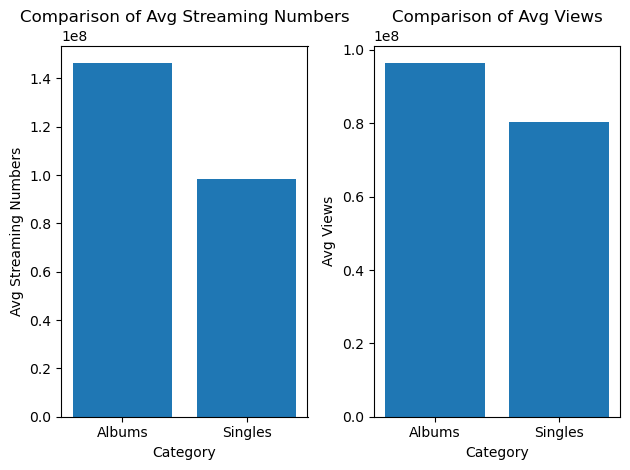

In [34]:
# Calculate mean streaming numbers or views
album_mean_streaming = album_streaming.mean()
single_mean_streaming = single_streaming.mean()
album_mean_views = album_views.mean()
single_mean_views = single_views.mean()

# Create a bar plot
categories = ['Albums', 'Singles']
mean_values_streaming = [album_mean_streaming, single_mean_streaming]
mean_values_views = [album_mean_views, single_mean_views]

plt.subplot(1, 2, 1)
plt.bar(categories, mean_values_streaming)
plt.xlabel('Category')
plt.ylabel('Avg Streaming Numbers')
plt.title('Comparison of Avg Streaming Numbers')

plt.subplot(1, 2, 2)
plt.bar(categories, mean_values_views)
plt.xlabel('Category')
plt.ylabel('Avg Views')
plt.title('Comparison of Avg Views')

plt.tight_layout()
plt.show()

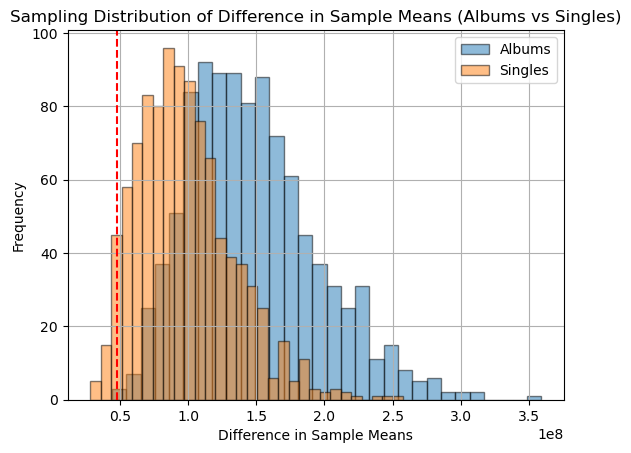

In [35]:

# Set the number of iterations and the sample size for each iteration
num_iterations = 1000
sample_size = 30

# Create an array to store the sample means
album_sample_means = np.zeros(num_iterations)
single_sample_means = np.zeros(num_iterations)

# Iterate through the specified number of iterations
for i in range(num_iterations):
    # Randomly sample from album streaming and calculate the sample mean
    album_sample = np.random.choice(album_streaming, size=sample_size, replace=True)
    album_sample_mean = np.mean(album_sample)

    # Randomly sample from single streaming and calculate the sample mean
    single_sample = np.random.choice(single_streaming, size=sample_size, replace=True)
    single_sample_mean = np.mean(single_sample)

    # Calculate the difference in sample means
    album_sample_means[i] = album_sample_mean
    single_sample_means[i] = single_sample_mean

# Perform statistical test on the sampling distribution
t_stat, p_value = ttest_ind(album_streaming, single_streaming)

# Plot a histogram of the sampling distribution
plt.hist(album_sample_means, bins=30, alpha=0.5, edgecolor='black', label='Albums')
plt.hist(single_sample_means, bins=30, alpha=0.5, edgecolor='black', label='Singles')
plt.xlabel('Difference in Sample Means')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of Difference in Sample Means (Albums vs Singles)')
plt.grid(True)
plt.legend()

# Add a vertical line to represent the observed difference in sample means
observed_diff = np.mean(album_streaming) - np.mean(single_streaming)
plt.axvline(x=observed_diff, color='red', linestyle='--', label='Observed Difference')

plt.show()

## Comparing Numbers between Major and Minor Keys:

The project explores the impact of musical key (represented using standard Pitch Class notation) on streaming numbers and YouTube viewership. By analyzing the differences between songs in major keys and songs in minor keys, insights can be gained into the potential influence of musical tonality on audience engagement.

* **Null Hypothesis (H0):** There is no significant difference between the mean streaming numbers of songs in major keys and mean streaming numbers of songs in minor keys.
* **Alternative Hypothesis (H1):** There is a significant difference between the mean streaming numbers of songs in major keys and mean streaming numbers of songs in minor keys.

In [36]:
# Filter the data for major keys and minor keys using the Pitch Class notation
major_keys = df[df['Key'].isin([0, 2, 4, 5, 7, 9, 11])]  # Filter for major keys (0, 2, 4, 5, 7, 9, 11)
minor_keys = df[df['Key'].isin([1, 3, 6, 8, 10])]  # Filter for minor keys (1, 3, 6, 8, 10)

In [37]:
# Extract the streaming numbers for major keys and minor keys
major_key_streaming = major_keys['Stream']
minor_key_streaming = minor_keys['Stream']

In [38]:
# Check for NaN values in major_keys
major_keys_has_nans = major_keys.isnull().any().any()
if major_keys_has_nans:
    print("major_keys contains NaN values.")
else:
    print("major_keys does not contain NaN values.")

# Check for NaN values in minor_keys
minor_keys_has_nans = minor_keys.isnull().any().any()
if minor_keys_has_nans:
    print("minor_keys contains NaN values.")
else:
    print("minor_keys does not contain NaN values.")


major_keys contains NaN values.
minor_keys contains NaN values.


In [39]:
# Fill NaN values of major_keys and minor_keys datasets with zero
major_key_streaming = major_key_streaming.fillna(0)
minor_key_streaming = minor_key_streaming.fillna(0)

In [40]:
# Step 6: Apply Central Limit Theorem - Sampling
sample_size = 1000  # Define the sample size
num_samples = 500  # Define the number of samples

In [41]:
# Initialize arrays to store sample means
major_key_sample_means = np.zeros(num_samples)
minor_key_sample_means = np.zeros(num_samples)

In [42]:
# Generate samples and calculate sample means
for i in range(num_samples):
    major_key_sample = np.random.choice(major_key_streaming, size=sample_size, replace=True)
    minor_key_sample = np.random.choice(minor_key_streaming, size=sample_size, replace=True)
    major_key_sample_means[i] = np.mean(major_key_sample)
    minor_key_sample_means[i] = np.mean(minor_key_sample)

In [43]:
# Perform statistical analysis on sample means
t_stat, p_value = ttest_ind(major_key_sample_means, minor_key_sample_means)

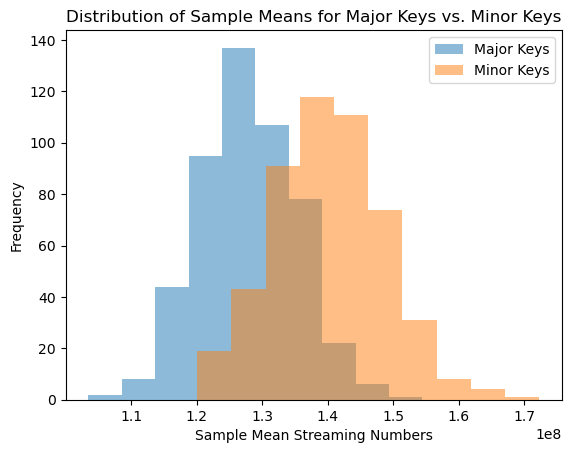

In [44]:
# Visualize the distributions of sample means
plt.hist(major_key_sample_means, alpha=0.5, label='Major Keys')
plt.hist(minor_key_sample_means, alpha=0.5, label='Minor Keys')
plt.xlabel('Sample Mean Streaming Numbers')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means for Major Keys vs. Minor Keys')
plt.legend()

plt.show()

In [45]:
# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a significant difference between major key streaming and minor key streaming.")
else:
    print("There is no significant difference between major key streaming and minor key streaming.")

There is a significant difference between major key streaming and minor key streaming.


In [46]:
# Additional Analysis
major_key_mean = np.mean(major_key_streaming)
minor_key_mean = np.mean(minor_key_streaming)

major_key_sampling_mean = np.mean(major_key_sample_means)
minor_key_sampling_mean = np.mean(minor_key_sample_means)

major_key_sampling_std = np.std(major_key_sample_means)
minor_key_sampling_std = np.std(minor_key_sample_means)

print("Mean streaming in Major keys:", major_key_mean)
print("Mean streaming in Minor keys:", minor_key_mean)

print("\nSampling mean of Major keys:", major_key_sampling_mean)
print("Sampling mean of Minor keys:", minor_key_sampling_mean)

print("\nSampling standard deviation of Major keys:", major_key_sampling_std)
print("Sampling standard deviation of Minor keys:", minor_key_sampling_std)

Mean streaming in Major keys: 127775589.63622865
Mean streaming in Minor keys: 140319434.7960254

Sampling mean of Major keys: 127839035.83731799
Sampling mean of Minor keys: 140126956.868948

Sampling standard deviation of Major keys: 7363203.072310138
Sampling standard deviation of Minor keys: 8403833.519888576


## Comparing Numbers between Music Artists:

The analysis extends to comparing streaming numbers and YouTube viewership across different music artists. By examining the variations in popularity and viewership between artists, it becomes possible to identify trends and factors contributing to their respective levels of success.

* **Null Hypothesis (H0):** There is no significant difference between the mean streaming numbers and mean YouTube views for songs by different music artists in the dataset.
* **Alternative Hypothesis (H1):** There is a significant difference between the mean streaming numbers and mean YouTube views for songs by different music artists in the dataset.

In [47]:
# Group the data by artist and calculate the mean streaming numbers and YouTube views for each artist
artist_stats = df.groupby('Artist').agg({'Stream': 'mean', 'Views': 'mean'})
artist_stats.head()

,Stream,Views
Artist,,
$NOT,112763800.2,11078490.3
$uicideboy$,212674813.0,33413510.8
(G)I-DLE,130421245.8,175495394.1
*NSYNC,142783375.6,102783286.2
070 Shake,46474861.7,9609935.9


In [48]:
# Extract the streaming numbers and YouTube views for each artist
streaming_numbers = artist_stats['Stream']
youtube_views = artist_stats['Views']

In [49]:
# Sort artists based on streaming numbers and YouTube views
artists_sorted_by_streaming = artist_stats.sort_values(by='Stream', ascending=False)
artists_sorted_by_views = artist_stats.sort_values(by='Views', ascending=False)


In [50]:
# Get the artists with the most streaming numbers and YouTube views
top_streaming_artists = artists_sorted_by_streaming.head(5)
top_views_artists = artists_sorted_by_views.head(5)

In [51]:
# Fill NaN values with zero
streaming_numbers = spotify_streaming.fillna(0)
youtube_views = youtube_views.fillna(0)

In [52]:
# Apply Central Limit Theorem - Sampling
sample_size = 1000  # Define the sample size
num_samples = 500  # Define the number of samples


In [53]:
# Initialize arrays to store sample means
sample_means_streaming = []
sample_means_youtube = []

In [54]:
# Generate samples and calculate sample means for streaming numbers and YouTube views
for artist, streaming, views in zip(artist_stats.index, streaming_numbers, youtube_views):
    streaming_samples = np.random.normal(loc=streaming, scale=np.std(streaming),
                                         size=(num_samples, sample_size))
    youtube_samples = np.random.normal(loc=views, scale=np.std(views),
                                       size=(num_samples, sample_size))
    sample_means_streaming.extend(np.mean(streaming_samples, axis=1))
    sample_means_youtube.extend(np.mean(youtube_samples, axis=1))

In [55]:
# Perform statistical analysis on sample means
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(sample_means_streaming, sample_means_youtube)
t_stat, p_value

(411.5797650789638, 0.0)

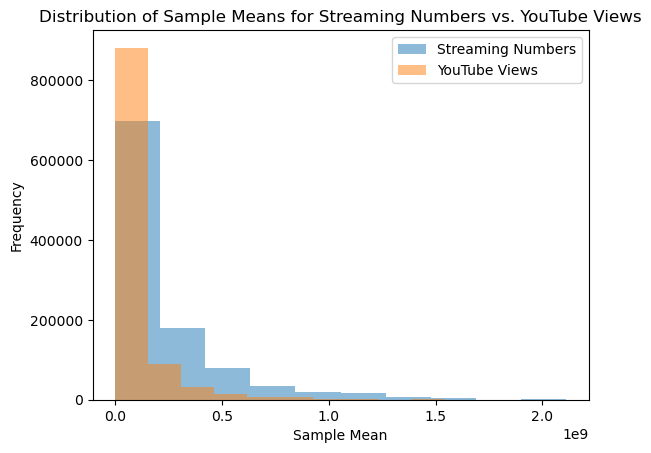

In [56]:
# Visualize the distributions of sample means
plt.hist(sample_means_streaming, alpha=0.5, label='Streaming Numbers')
plt.hist(sample_means_youtube, alpha=0.5, label='YouTube Views')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means for Streaming Numbers vs. YouTube Views')
plt.legend()
plt.show()


### Comparison of Avg Streaming Numbers and Avg YouTube Views Among Music Artists:

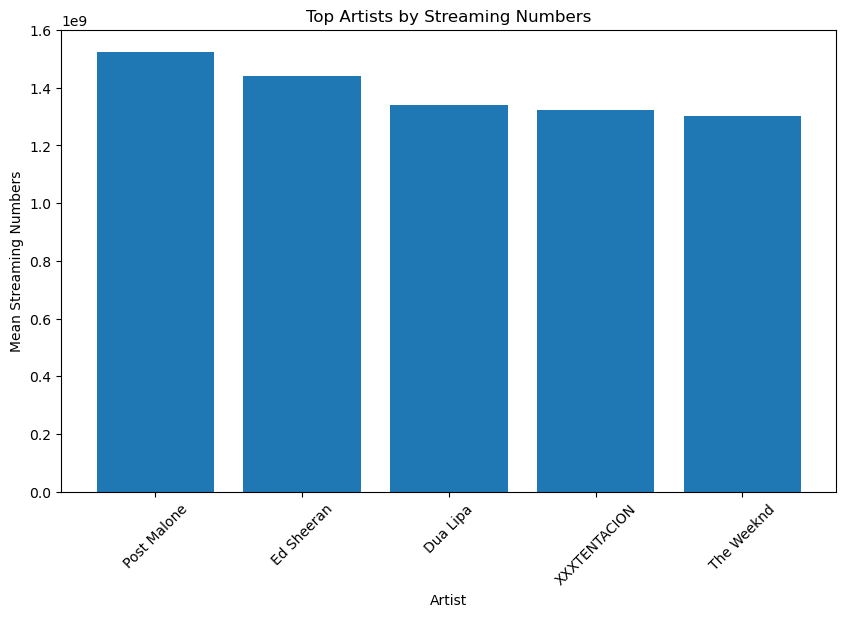

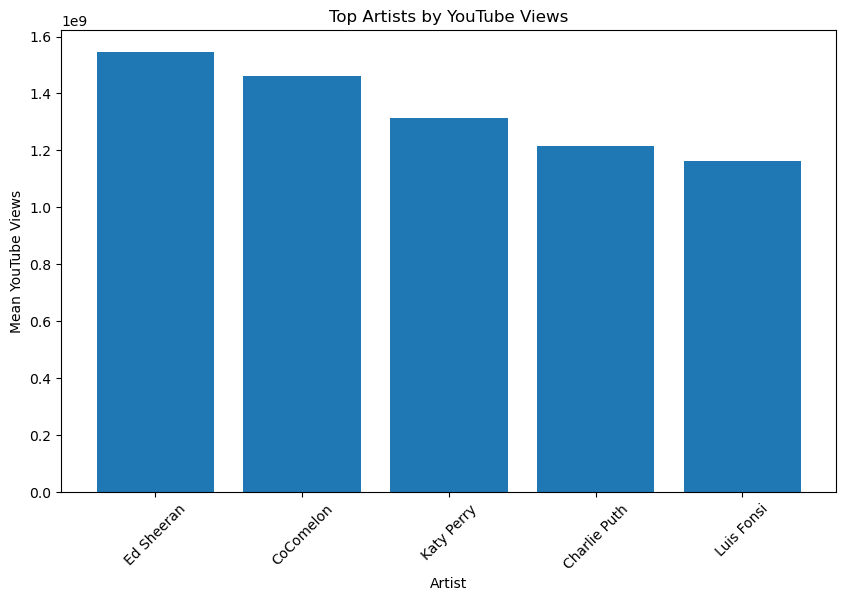

In [57]:
# Data visualizations for top streaming artists
plt.figure(figsize=(10, 6))
plt.bar(top_streaming_artists.index, top_streaming_artists['Stream'])
plt.xlabel('Artist')
plt.ylabel('Mean Streaming Numbers')
plt.title('Top Artists by Streaming Numbers')
plt.xticks(rotation=45)
plt.show()

# Data visualizations for top artists with the most YouTube views 
plt.figure(figsize=(10, 6))
plt.bar(top_views_artists.index, top_views_artists['Views'])
plt.xlabel('Artist')
plt.ylabel('Mean YouTube Views')
plt.title('Top Artists by YouTube Views')
plt.xticks(rotation=45)
plt.show()


In [58]:
# Calculate the mean streaming numbers and mean YouTube views for each music artist
artist_mean_streaming = df.groupby('Artist')['Stream'].mean()
artist_mean_youtube = df.groupby('Artist')['Views'].mean()

# Get the top five music artists with the highest streaming numbers
top_streaming_artists = artist_mean_streaming.nlargest(5).index.tolist()

# Get the top five music artists with the highest YouTube views
top_youtube_artists = artist_mean_youtube.nlargest(5).index.tolist()

# Compare the mean streaming numbers and mean YouTube views for the top artists
print("Top Artists with Highest Streaming Numbers:\n")
for artist in top_streaming_artists:
    streaming_mean = artist_mean_streaming[artist]
    print(f"{artist}: Avg Streaming Numbers = {streaming_mean}\n")

print("\nTop Artists with Highest YouTube Views:\n")
for artist in top_youtube_artists:
    youtube_mean = artist_mean_youtube[artist]
    print(f"{artist}: Avg YouTube Views = {youtube_mean}\n")




Top Artists with Highest Streaming Numbers:

Post Malone: Avg Streaming Numbers = 1525126385.3

Ed Sheeran: Avg Streaming Numbers = 1439488155.7

Dua Lipa: Avg Streaming Numbers = 1340807627.4

XXXTENTACION: Avg Streaming Numbers = 1322435169.9

The Weeknd: Avg Streaming Numbers = 1303197337.6


Top Artists with Highest YouTube Views:

Ed Sheeran: Avg YouTube Views = 1546020776.9

CoComelon: Avg YouTube Views = 1460167121.1

Katy Perry: Avg YouTube Views = 1312063207.5

Charlie Puth: Avg YouTube Views = 1216759419.1

Luis Fonsi: Avg YouTube Views = 1162811303.1



In [59]:
# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a significant difference between streaming numbers and YouTube views.")
else:
    print("There is no significant difference between streaming numbers and YouTube views.")

There is a significant difference between streaming numbers and YouTube views.


### Correlation Analysis between Streaming Numbers and YouTube Views Among Music Artists:

In [60]:
# Create arrays for streaming numbers and YouTube views for the top artists
streaming_numbers_top = np.array([artist_mean_streaming[artist] for artist in top_streaming_artists])
youtube_views_top = np.array([artist_mean_youtube[artist] for artist in top_youtube_artists])

# Perform correlation analysis
correlation = np.corrcoef(streaming_numbers_top, youtube_views_top)[0, 1]
correlation_percentage = correlation ** 2 * 100

print("Correlation between Avg Streaming Numbers and Avg YouTube Views Among the Top Music Artists: {:.2f}%".format(correlation_percentage))



Correlation between Avg Streaming Numbers and Avg YouTube Views Among the Top Music Artists: 94.53%
